In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Users\XPC\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\XPC\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\XPC\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\XPC\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dty

## Cargar Datos

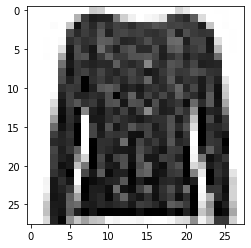

In [2]:
# Descargar el mnist de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Imprimir un sample
import matplotlib.pyplot as plt
plt.imshow(x_test[89], cmap='Greys')
plt.show()

## Normalizar Imagenes

In [3]:
# Scaling para que las imagenes queden de [0,1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape

(60000, 28, 28)

In [4]:
# Convertir las imagenes en (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train.shape

(60000, 28, 28, 1)

## Etiquetas como Categoricos

In [5]:
# Numero de clases
num_classes = 10

# generar las etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Arquitetura Perceptron

In [6]:
# tamano de la imagen de entrada
input_shape = (28, 28, 1)

# definicion del modelo Perceptron
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Construir el modelo y ver la arquitectura
model.build(input_shape)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              205824    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 892,754
Trainable params: 892,754
Non-trainable params: 0
________________________________________________________________

## Entrenar la Red Neuronal

In [7]:
# Definir los parametros de optimizacion y perdida del modelo (con CrossValidation)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# ejecutar training
history = model.fit(x_train, y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.5456 - acc: 0.8061 - val_loss: 0.4161 - val_acc: 0.8468
Epoch 2/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.3763 - acc: 0.8619 - val_loss: 0.3749 - val_acc: 0.8653
Epoch 3/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.3264 - acc: 0.8792 - val_loss: 0.3534 - val_acc: 0.8727
Epoch 4/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.2989 - acc: 0.8891 - val_loss: 0.3293 - val_acc: 0.8808
Epoch 5/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.2820 - acc: 0.8943 - val_loss: 0.3260 - val_acc: 0.8816
Epoch 6/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.2643 - acc: 0.9008 - val_loss: 0.3313 - val_acc: 0.8838
Epoch 7/50
48000/48000 [==============================] - 0s 8us/sample - loss: 0.2472 - acc: 0.9070 - val_loss: 0.3255 -

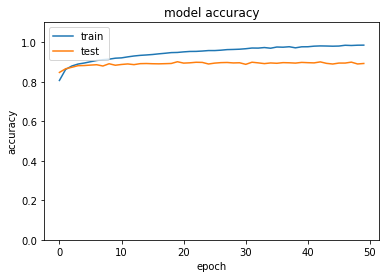

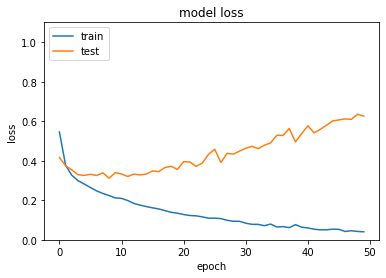

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

## Evaluar el Modelo

In [9]:
# Obtener el score obtenido del modelo
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 0s 23us/sample - loss: 0.6770 - acc: 0.8898
Test loss: 0.6770201461190358
Test accuracy: 0.8898


## Predecir una Imagen

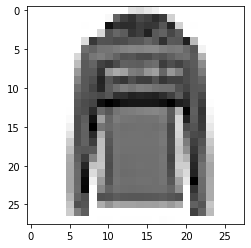

[[1.9298761e-06 4.8062748e-07 9.2960316e-01 3.9062849e-07 7.0320964e-02
  1.5900069e-07 7.2418414e-05 2.2974390e-08 2.9773250e-07 7.2153306e-08]]

Prediccion: Pullover


In [10]:
# obtener una imagen del dataset
(_, _), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

import random

ind = random.randint(10,1000)

testimg = x_test[ind]

# imprimir
plt.imshow(x_test[ind], cmap='Greys')
plt.show()

# normalizar la imagen y expandirla
testimg = testimg.astype("float32") / 255
testimg = np.expand_dims(testimg, -1)

# generar las probabilidades
y_pred = model.predict(np.array([testimg]))

# imprimir la lista de probabilidades
print(y_pred)

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# argmax saca la clase con la probabilidad mas alta
y_class = y_pred.argmax(axis=-1)

# imprimir la clase
print("")
print("Prediccion:",labels[y_class[0]])